In [3]:
from support_functions import Tictoe, Player
import numpy as np
from tqdm import tqdm
import pandas as pd
import dill
# with open('tree_tactoe_3x3.pkl', 'rb') as f:
#     tree = dill.load(f)
tictactoe = Tictoe(3)

# untrained_player = Player(1, tree)  

# no_episodes = 1000
# rewards = pd.Series(np.zeros(no_episodes))
# for ep_idx in tqdm(range(no_episodes)):
#     while not tictactoe.is_endstate():
#         tictactoe = untrained_player.make_move(tictactoe)
#         tictactoe = untrained_player.make_computer_move(tictactoe)
        
#     rewards[ep_idx] = tictactoe.get_reward(1)
#     tictactoe.reset_board()
# print(rewards.value_counts())
# import dill

with open('trained_player.pkl', 'rb') as f:
    trained_player = dill.load(f)
trained_player.set_params(epsilon=0) # Full exploitation, no random moves

no_episodes = 1000
rewards = pd.Series(np.zeros(no_episodes))
for ep_idx in tqdm(range(no_episodes)):
    while not tictactoe.is_endstate():
        tictactoe = trained_player.make_move(tictactoe)
        tictactoe = trained_player.make_computer_move(tictactoe)
        
    rewards[ep_idx] = tictactoe.get_reward(1)
    tictactoe.reset_board()
print(rewards.value_counts())

100%|██████████| 1000/1000 [00:01<00:00, 875.85it/s]

5.0    1000
dtype: int64


E:\PythonNamestitev\lib\site-packages\plotnine\layer.py:401: PlotnineWarning: geom_text : Removed 938 rows containing missing values.


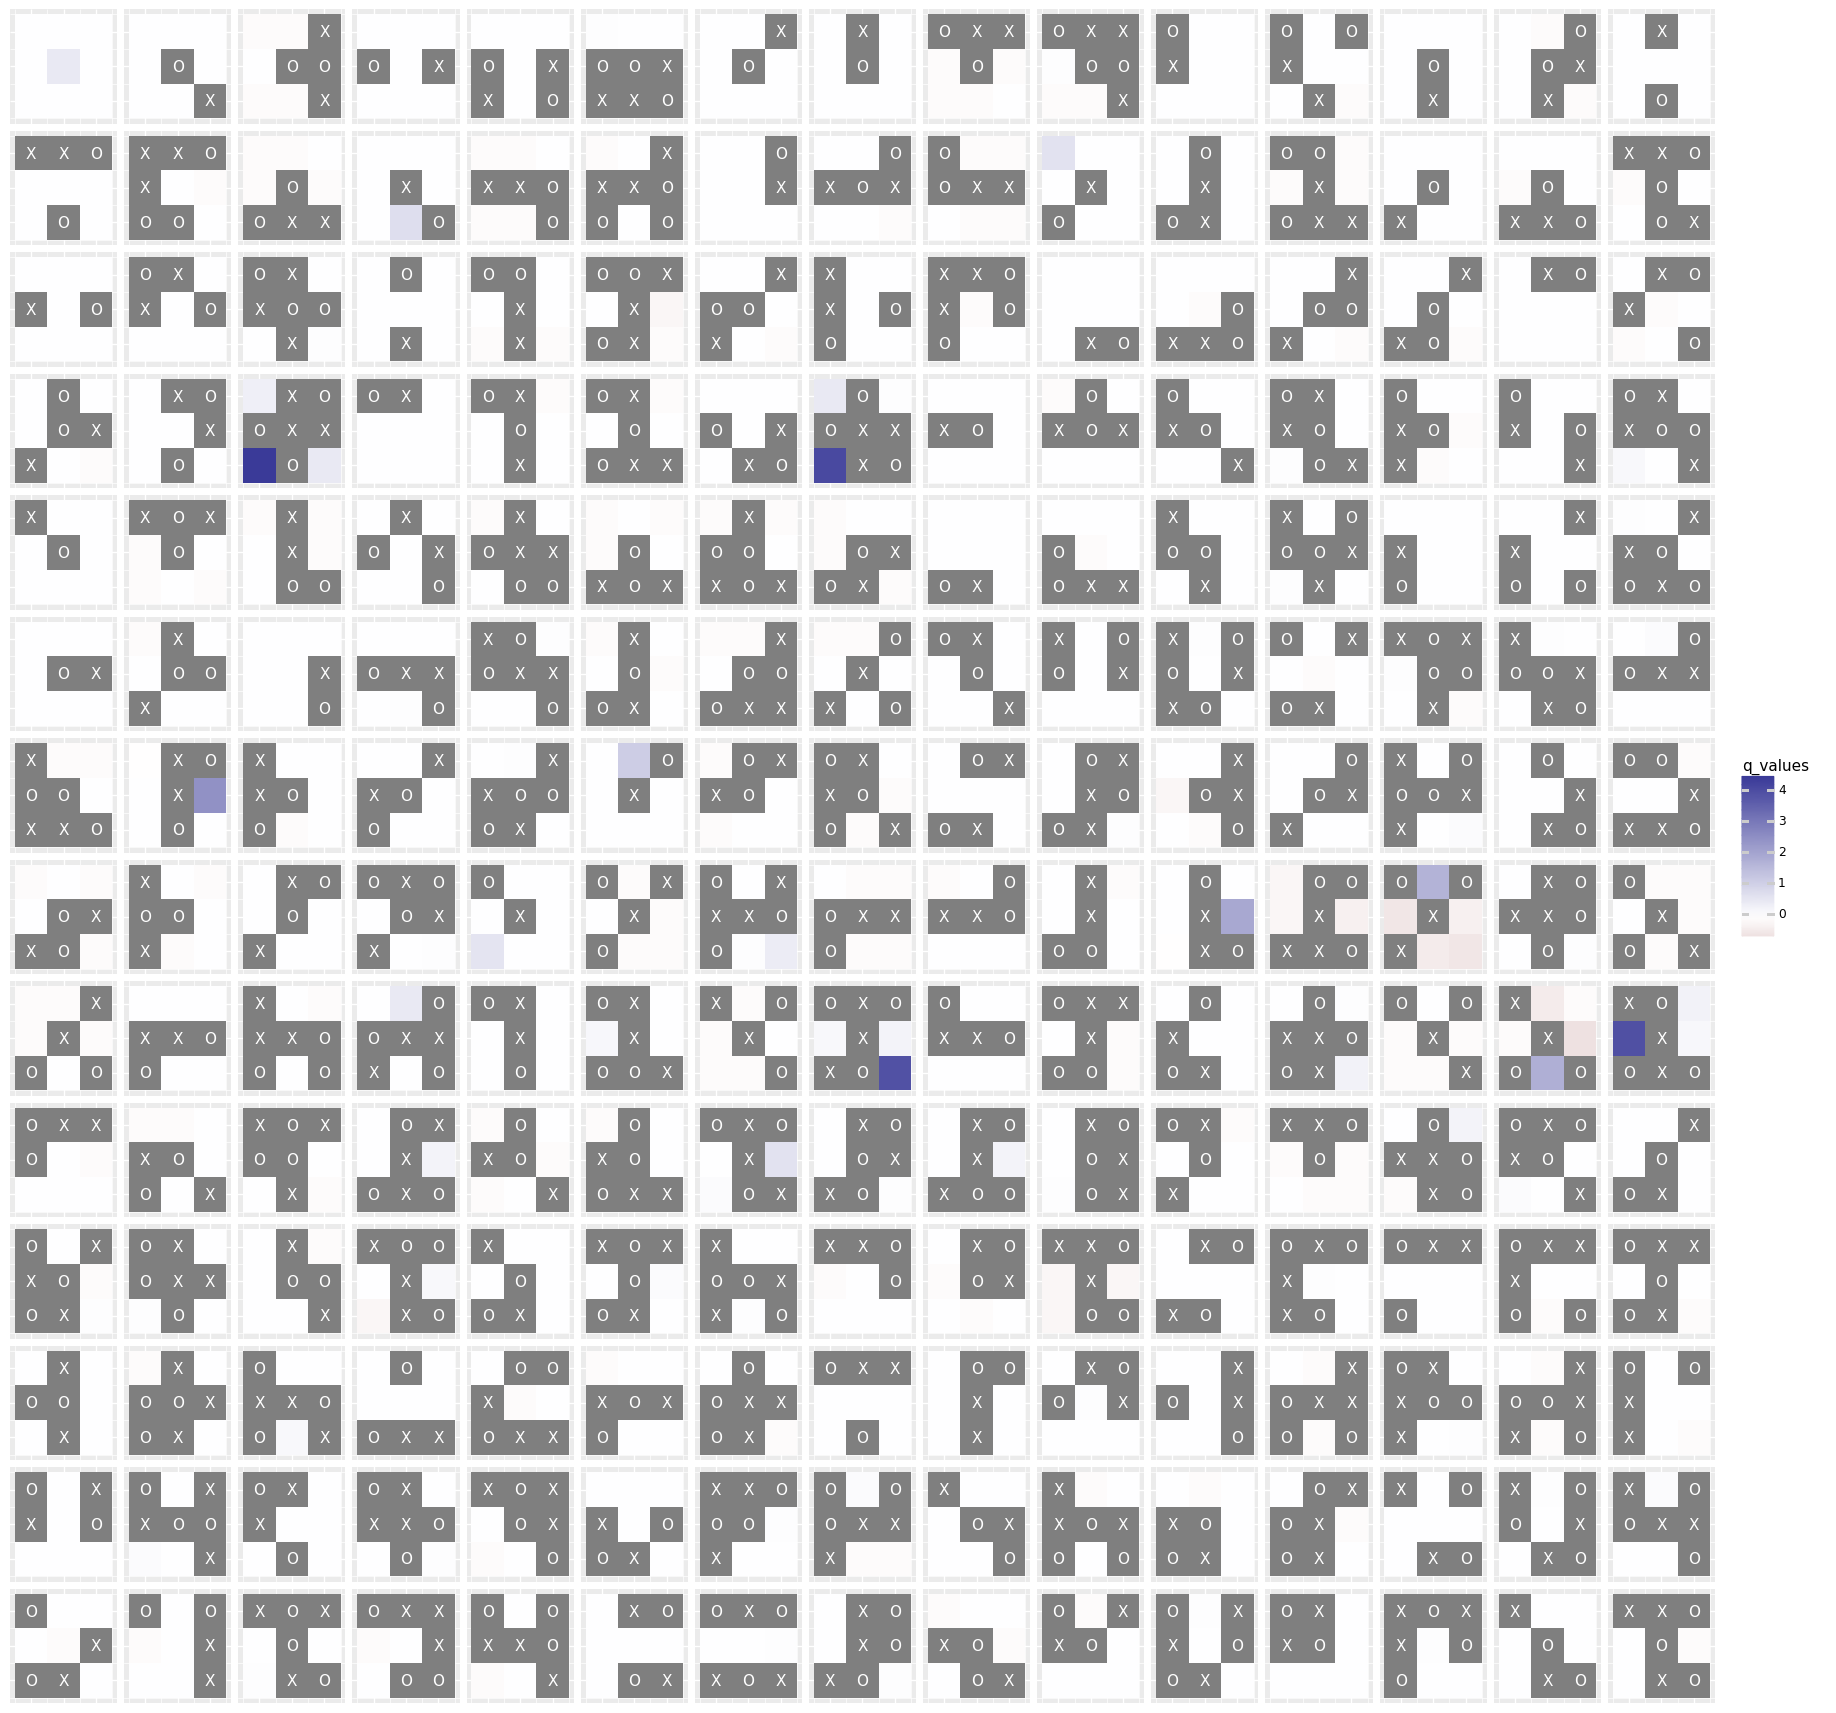

<ggplot: (176167455793)>

In [4]:
trained_player.plot_qtable()